In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

degree_sign= u'\N{DEGREE SIGN}'

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=125)
lngs = np.random.uniform(low=-180.000, high=180.000, size=125)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
print(len(cities))


92


In [17]:
#create a df of cities
city_df_blank=pd.DataFrame(cities, columns=['City'])
#city_df.rename(columns={0:'New'})

#add new fields to df
def add_fields(x):
    x['Temperature (F)']=""
    x['Humitidy (%)']=""
    x['Cloudiness (%)']=""
    x['Wind Speed (mph)']=""
    x['Lattitude']=""
    x['Longitude']=""
    x['Distance From Equator']=""

add_fields(city_df_blank)#apply function



## Perform API Calls

In [18]:


# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key #+f"&q={city_df['City'][0]}"
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=48c662d8e2fbc87db3c1601e94215d84'

In [19]:
city_df_raw=city_df_blank
# response = requests.get(url)
# r=response.json()
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
missing=0
# use iterrows to iterate through pandas dataframe
for index, row in city_df_raw.iterrows():
    
    # get restaurant type from df
    city_to_find = row['City']

    # assemble url and make API request
    #print(f"Retrieving Results for Index {index}: {city_to_find}.")
    response = requests.get(base_url+f'&q={city_to_find}').json()

    try:
        #print(response)#(f"Temp is results['main']['temp'] in row['City'].")

        city_df_raw.loc[index,'Temperature (F)'] = float(response['main']['temp'])
        city_df_raw.loc[index,'Lattitude'] = response['coord']['lat']
        city_df_raw.loc[index,'Longitude'] = response['coord']['lon']
        city_df_raw.loc[index,'Humitidy (%)'] = response['main']['humidity']
        city_df_raw.loc[index,'Cloudiness (%)'] = response['clouds']['all']
        city_df_raw.loc[index,'Wind Speed (mph)'] = response['wind']['speed']
        
    except (KeyError, IndexError):
        missing +=1
print(f'missing: {missing}')
print('Start ' +str(len(cities)))

missing: 7
Start 92


In [25]:
#city_df_raw['Lattitude'][0]
city_df_clean=city_df_raw

city_df_clean.replace('',np.nan, inplace=True)
city_df_clean['Distance From Equator']=abs(0 - city_df_clean['Lattitude'])


city_df_clean.head()

city_df_wo_nan=city_df_clean.dropna()
city_df_wo_nan.head()
# city_df_clean

,City,Temperature (F),Humitidy (%),Cloudiness (%),Wind Speed (mph),Lattitude,Longitude,Distance From Equator
1,ayan,72.87,50.0,36.0,3.60,40.67,33.60,40.67
3,mataura,33.90,99.0,0.0,5.17,-46.19,168.86,46.19
4,flinders,53.60,62.0,75.0,17.22,-34.58,150.85,34.58
5,hailey,57.20,44.0,5.0,9.17,43.52,-114.32,43.52
6,ribeira grande,78.80,65.0,75.0,14.99,38.52,-28.70,38.52


Text(-2,33,'y=-0.520721x+(83.716319)')

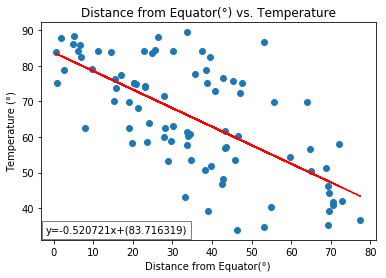

In [116]:
xax=city_df_wo_nan['Distance From Equator']
yax=city_df_wo_nan['Temperature (F)']



fig1 = plt.figure()  # an empty figure with no axes

ax1=fig1.add_subplot(1,1,1)




ax1.scatter(xax,yax)
# calc the trendline
z = np.polyfit(xax, yax, 1)
p = np.poly1d(z)
ax1.plot(xax,p(xax),"r--")
# the line equation:
equation="y=%.6fx+(%.6f)"%(z[0],z[1])
ax1.title.set_text(f"Distance from Equator({degree_sign}) vs. Temperature")
ax1.set_ylabel(f'Temperature ({degree_sign})')
ax1.set_xlabel(f"Distance from Equator({degree_sign})")
ax1.text(-2,33,equation,bbox=dict(facecolor='white',alpha=0.5))
#plt.plot(xax,yax,'o')

# b, m = np.polyfit(xax, yax, 1)

# plt.plot(xax, yax, '.')
# plt.plot(xax, b + m * xax, '-')
# plt.show()

In [8]:

# print(city_df.head())
# #city_df.loc[city_df['Cloudiness (%)'] ==44]

# city_df['Longitude'].convert_objects(convert_numeric=True)
# city_df['Longitude'].apply(pd.to_numeric)
# #city_df.loc[city_df['Longitude']>-0.6]

# city_df.loc[city_df['Longitude']>90]
# city_df['Longitude'].convert_objects
# city_df['Longitude'] = pd.to_numeric(city_df['Longitude'])

# def convert_to_float(x,y):
#     try:
#         pd.to_numeric(x[y])
#     except:
#         next
# new_df= city_df.apply(convert_to_float)


# city_df[['Lattitude','Longitude']].apply(pd.to_numeric)
# city_df.dtypes
# #how do i create a function to convert all cols to float AND keep str columns???

<Figure size 432x288 with 0 Axes>

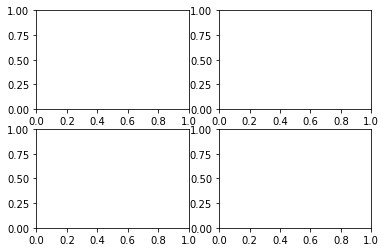

In [34]:
fig = plt.figure()  # an empty figure with no axes
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
